#### *Problem Formulation:

-This is a binary classification task. Containing a tabular dataset called ("Speed Dating Match Prediction") and the excepected goal from it to predict the outcome of a specific speed dating session based on the profile of two people.

-It has 192 features as input (information about the dating session) and as output, we are going to predict the probability (0-1, float) that the dating session will lead to a successful match. So we can implement a recommendation system to better match people in speed dating events.

-The data mining function that we need in this problems is binary classification and predictions models for output.

-The challenges are that the dataset is clean, but has a lot of missing values. The strategy for missing value replacement has to be tuned. And choosing the best feature selection method for selecting the appropriate features. As well as, this dataset is highly unbalanced (mostly unmatched).

-The impact of the product on real life help making better match people in speed dating events. Because it is normal for a person to try more than one date until he finds a suitable partner so it quick this process by providing better matching.

-The life cycle of data mining model to be able to predict the probability of successful match is divided to several steps:

*Problem understanding

-Data collection.

-Data preparation.

-Modeling. (We use 2 Different Classifiers)

-Evaluation.

*What is an ideal solution?

-The ideal solution is to make the appropriate preprocessing on the important columns that will be important and positively affect predicting the probability of successful match.

*What is the experimental protocol used and how was it carried out? What preprocessing steps are used?

-The experimental protocol used is (The Cross-validation) because it is usually the preferred method as it gives the model the opportunity to train on multiple train-test splits. This gives a better indication of how well the model will perform on unseen data.

-The general procedure is as follows:

Shuffle the dataset randomly.
Split the dataset into k groups
For each unique group: Take the group as a hold out or test data set Take the remaining groups as a training data set Fit a model on the training set and evaluate it on the test set Retain the evaluation score and discard the model
Summarize the skill of the model using the sample of model evaluation scores
Preprocessing steps that I need:

1)Handling missing values.

2)Handling numerical features.

3)Handling catigorical features.

4)Scaling and Normlization data.

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# #import libraries 

In [1]:
# For uploading and accessing the data
import numpy as np
import pandas as pd

# for Data Visualization
import matplotlib.pyplot as plt

# for making statistical graphics.
import seaborn as sns

# for Encode categorical features as a numeric values
from sklearn.preprocessing import LabelEncoder

# for scaling the data
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# for split data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

# for fitting Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
# for calculate accuracy_score, f1_score
from sklearn.metrics import f1_score, accuracy_score, classification_report ,confusion_matrix

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline #pipeline is a way to codify and automate the workflow
from sklearn.impute import SimpleImputer #Imputation transformer for completing missing values.
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Standardize features by removing the mean and scaling to unit variance.
from xgboost.sklearn import XGBClassifier #Model binary classification
import warnings #handling warning 
warnings.filterwarnings('ignore')

# load and explore the Data

In [2]:
# reading the training dataset 
df_train = pd.read_csv('train1.csv') 

In [3]:
# reading the testing dataset 
df_test = pd.read_csv('test1.csv') 

In [4]:
df_train.head()

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0       0    3       2    14     18         2       2.0     14       12   
1       1   14       1     3     10         2       NaN      8        8   
2       1   14       1    13     10         8       8.0     10       10   
3       1   38       2     9     20        18      13.0      6        7   
4       1   24       2    14     20         6       6.0     20       17   

     pid  ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0  372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
1   63.0  ...      8.0       8.0     7.0     8.0      NaN      NaN       NaN   
2  331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
3  200.0  ...      9.0       8.0     8.0     6.0      NaN      NaN       NaN   
4  357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   

   fun5_3  amb5_3    id  
0     NaN     NaN  2583  
1     NaN     NaN  6830  
2     NaN     NaN  4840  
3     NaN     NaN  5508  
4     NaN     NaN  4828  

[5 rows x 192 columns]

In [5]:
df_test.head()

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0       0    5       2     2     16         3       NaN     13       13   
1       0   33       2    14     18         6       6.0      4        8   
2       1    6       2     9     20        10      16.0     15       19   
3       1   26       2     2     19        15       NaN      8       10   
4       0   29       2     7     16         7       7.0     10        5   

     pid  ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0   52.0  ...      7.0       8.0     6.0     8.0      NaN      NaN       NaN   
1  368.0  ...      8.0       7.0     7.0     8.0      6.0      7.0       6.0   
2  212.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
3   30.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
4  162.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   

   fun5_3  amb5_3    id  
0     NaN     NaN   934  
1     5.0     5.0  6539  
2     NaN     NaN  6757  
3     NaN     NaN  2275  
4     NaN     NaN  1052  

[5 rows x 191 columns]

In [6]:

# shape of data
df_train.shape

(5909, 192)

In [7]:
df_test.shape

(2469, 191)

In [8]:
df_train.describe()

gender          idg       condtn         wave        round  \
count  5909.000000  5909.000000  5909.000000  5909.000000  5909.000000   
mean      0.505331    17.360298     1.824843    11.347436    16.850228   
std       0.500014    10.947542     0.380133     6.011495     4.389246   
min       0.000000     1.000000     1.000000     1.000000     5.000000   
25%       0.000000     8.000000     2.000000     7.000000    14.000000   
50%       1.000000    16.000000     2.000000    11.000000    18.000000   
75%       1.000000    26.000000     2.000000    15.000000    20.000000   
max       1.000000    44.000000     2.000000    21.000000    22.000000   

          position     positin1       order      partner          pid  ...  \
count  5909.000000  4591.000000  5909.00000  5909.000000  5901.000000  ...   
mean      9.001523     9.254846     8.91166     8.962938   283.733266  ...   
std       5.482368     5.611803     5.45710     5.500706   158.993002  ...   
min       1.000000     1.000000     1.00000     1.000000     1.000000  ...   
25%       4.000000     4.000000     4.00000     4.000000   153.000000  ...   
50%       8.000000     9.000000     8.00000     8.000000   280.000000  ...   
75%      13.000000    14.000000    13.00000    13.000000   409.000000  ...   
max      22.000000    22.000000    22.00000    22.000000   552.000000  ...   

           sinc3_3     intel3_3       fun3_3       amb3_3      attr5_3  \
count  2804.000000  2804.000000  2804.000000  2804.000000  1413.000000   
mean      8.105563     8.377318     7.644437     7.398716     6.799717   
std       1.601011     1.459013     1.757559     1.956924     1.535768   
min       2.000000     3.000000     2.000000     1.000000     2.000000   
25%       7.000000     8.000000     7.000000     6.000000     6.000000   
50%       8.000000     8.000000     8.000000     8.000000     7.000000   
75%       9.000000     9.000000     9.000000     9.000000     8.000000   
max      12.000000    12.000000    12.000000    12.000000    10.000000   

           sinc5_3     intel5_3       fun5_3       amb5_3           id  
count  1413.000000  1413.000000  1413.000000  1413.000000  5909.000000  
mean      7.631989     7.944798     7.162774     7.092711  4191.314943  
std       1.498024     1.320919     1.687431     1.713729  2408.009173  
min       2.000000     4.000000     1.000000     1.000000     0.000000  
25%       7.000000     7.000000     6.000000     6.000000  2124.000000  
50%       8.000000     8.000000     7.000000     7.000000  4210.000000  
75%       9.000000     9.000000     8.000000     8.000000  6266.000000  
max      10.000000    10.000000    10.000000    10.000000  8372.000000  

[8 rows x 184 columns]

In [9]:
#this return the first ordered 60 columns have null value 
df_train.isnull().sum().sort_values(ascending=False)[:60]

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
shar7_2     4505
fun7_2      4498
intel7_2    4498
attr7_2     4498
attr7_3     4496
sinc7_3     4496
intel7_3    4496
fun7_3      4496
amb7_3      4496
shar7_3     4496
shar2_3     4496
attr5_3     4496
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
shar4_3     3838
fun4_3      3838
intel4_3    3838
sinc4_3     3838
attr4_3     3838
attr2_3     3838
sinc2_3     3838
intel2_3    3838
fun2_3      3838
amb2_3      3838
amb4_3      3838
mn_sat      3674
tuition     3365
attr1_3     3105
intel1_3    3105
amb3_3      3105
sinc3_3     3105
intel3_3    3105
shar1_3     3105
amb1_3      3105
fun1_3      3105
fun3_3      3105
attr3_3     3105
sinc1_3     3105
date_3      3105
you_call    3105
them_cal    3105
amb3_s      3069
sinc3_s     3069
intel3_s    3069
fun3_s      3069
attr3_s     3069
shar1_s     2994
amb1_s      2994
fun1_s      2994
intel1_s    2994
sinc1_s     2994
attr1_s     29

In [10]:
df_test.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     1866
intel5_3    1866
fun5_3      1866
amb5_3      1866
id             0
Length: 191, dtype: int64

In [11]:
# unique value for all train data
df_train.nunique()

gender         2
idg           44
condtn         2
wave          21
round         15
            ... 
sinc5_3        9
intel5_3       7
fun5_3        10
amb5_3         9
id          5909
Length: 192, dtype: int64

In [12]:
# unique value for all test data
df_test.nunique()

gender         2
idg           44
condtn         2
wave          21
round         15
            ... 
sinc5_3        9
intel5_3       7
fun5_3        10
amb5_3         9
id          2469
Length: 191, dtype: int64

In [13]:
#some information about the data
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Columns: 191 entries, gender to id
dtypes: float64(173), int64(10), object(8)
memory usage: 3.6+ MB
None


In [14]:
#virtualize the data correlation
corr = df_train.corr()

corr.style.background_gradient(cmap="Spectral")

In [15]:
from numpy.ma.core import array
#this return the first 60 columns have null value 
null_val = pd.DataFrame(df_train.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df_train.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:60]#make dataframe and calc percent of null value for each columns

null_val  percent_
num_in_3      5449      92.0
numdat_3      4849      82.0
expnum        4627      78.0
shar2_3       4496      76.0
fun7_2        4498      76.0
fun7_3        4496      76.0
intel7_3      4496      76.0
sinc7_3       4496      76.0
attr7_3       4496      76.0
shar7_2       4505      76.0
amb7_2        4519      76.0
intel7_2      4498      76.0
shar7_3       4496      76.0
sinc7_2       4519      76.0
attr7_2       4498      76.0
attr5_3       4496      76.0
sinc5_3       4496      76.0
intel5_3      4496      76.0
fun5_3        4496      76.0
amb5_3        4496      76.0
amb7_3        4496      76.0
amb2_3        3838      65.0
attr4_3       3838      65.0
shar4_3       3838      65.0
intel4_3      3838      65.0
fun4_3        3838      65.0
amb4_3        3838      65.0
fun2_3        3838      65.0
intel2_3      3838      65.0
sinc2_3       3838      65.0
sinc4_3       3838      65.0
attr2_3       3838      65.0
mn_sat        3674      62.0
tuition       3365      57.0
attr1_3       3105      53.0
intel1_3      3105      53.0
shar1_3       3105      53.0
attr3_3       3105      53.0
fun3_3        3105      53.0
intel3_3      3105      53.0
amb1_3        3105      53.0
sinc3_3       3105      53.0
fun1_3        3105      53.0
amb3_3        3105      53.0
sinc1_3       3105      53.0
date_3        3105      53.0
you_call      3105      53.0
them_cal      3105      53.0
attr3_s       3069      52.0
amb3_s        3069      52.0
fun3_s        3069      52.0
intel3_s      3069      52.0
sinc3_s       3069      52.0
fun1_s        2994      51.0
attr1_s       2994      51.0
sinc1_s       2994      51.0
intel1_s      2994      51.0
shar1_s       2994      51.0
amb1_s        2994      51.0
sinc5_2       2821      48.0

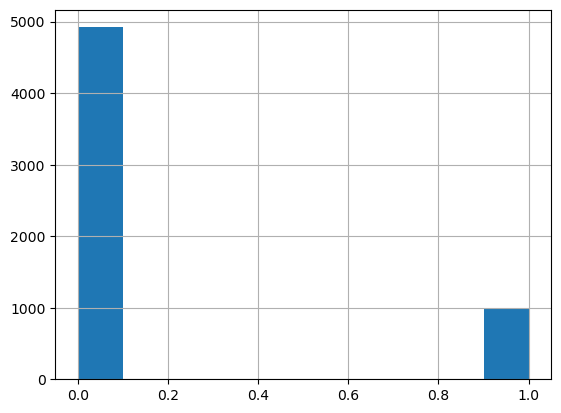

In [16]:
#distribution of the output 
df_train['match'].hist();

 It is clear that the data is imbalanced.

## Preprocessing

In [17]:
#Simple function which we can use directly by passing a dataframe and a threshold

#Remove columns with many missing values
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, axis=1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l

rmissingvaluecol(df_train,64)
     

# Columns having more than 64 percent missing values:  32
Columns:
 ['amb5_3', 'attr7_2', 'sinc4_3', 'amb2_3', 'amb7_3', 'intel2_3', 'fun4_3', 'attr7_3', 'attr4_3', 'sinc5_3', 'intel5_3', 'amb7_2', 'shar4_3', 'intel7_3', 'intel4_3', 'numdat_3', 'num_in_3', 'fun2_3', 'shar7_3', 'sinc2_3', 'sinc7_3', 'sinc7_2', 'expnum', 'shar7_2', 'shar2_3', 'attr5_3', 'fun5_3', 'fun7_3', 'amb4_3', 'attr2_3', 'intel7_2', 'fun7_2']


['gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 '

In [18]:
#Simple function which we can use directly by passing a dataframe and a threshold

#Remove columns with many missing values
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, axis=1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l

rmissingvaluecol(df_test,64)
     

# Columns having more than 64 percent missing values:  32
Columns:
 ['amb5_3', 'attr7_2', 'sinc4_3', 'amb2_3', 'amb7_3', 'intel2_3', 'fun4_3', 'attr7_3', 'attr4_3', 'sinc5_3', 'intel5_3', 'amb7_2', 'shar4_3', 'intel7_3', 'intel4_3', 'numdat_3', 'num_in_3', 'fun2_3', 'shar7_3', 'sinc2_3', 'sinc7_3', 'sinc7_2', 'expnum', 'shar7_2', 'shar2_3', 'attr5_3', 'fun5_3', 'fun7_3', 'amb4_3', 'attr2_3', 'intel7_2', 'fun7_2']


['gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',


In [19]:
#create a new dataframe excluding these columns
l = rmissingvaluecol(df_train, 64)
df_train = df_train[l]
print('\n Shape of new data after dropping some columns: ',df_train.shape)

# Columns having more than 64 percent missing values:  32
Columns:
 ['amb5_3', 'attr7_2', 'sinc4_3', 'amb2_3', 'amb7_3', 'intel2_3', 'fun4_3', 'attr7_3', 'attr4_3', 'sinc5_3', 'intel5_3', 'amb7_2', 'shar4_3', 'intel7_3', 'intel4_3', 'numdat_3', 'num_in_3', 'fun2_3', 'shar7_3', 'sinc2_3', 'sinc7_3', 'sinc7_2', 'expnum', 'shar7_2', 'shar2_3', 'attr5_3', 'fun5_3', 'fun7_3', 'amb4_3', 'attr2_3', 'intel7_2', 'fun7_2']

 Shape of new data after dropping some columns:  (5909, 160)


In [20]:
#create a new dataframe excluding these columns
l = rmissingvaluecol(df_test, 64)
df_test = df_test[l]
print('\n Shape of new data after dropping some columns: ',df_test.shape)

# Columns having more than 64 percent missing values:  32
Columns:
 ['amb5_3', 'attr7_2', 'sinc4_3', 'amb2_3', 'amb7_3', 'intel2_3', 'fun4_3', 'attr7_3', 'attr4_3', 'sinc5_3', 'intel5_3', 'amb7_2', 'shar4_3', 'intel7_3', 'intel4_3', 'numdat_3', 'num_in_3', 'fun2_3', 'shar7_3', 'sinc2_3', 'sinc7_3', 'sinc7_2', 'expnum', 'shar7_2', 'shar2_3', 'attr5_3', 'fun5_3', 'fun7_3', 'amb4_3', 'attr2_3', 'intel7_2', 'fun7_2']

 Shape of new data after dropping some columns:  (2469, 159)


In [21]:
#this return the first 60 columns have null value 
null_val = pd.DataFrame(df_train.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df_train.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:60]#make dataframe and calc percent of null value for each columns

null_val  percent_
mn_sat        3674      62.0
tuition       3365      57.0
date_3        3105      53.0
amb1_3        3105      53.0
attr1_3       3105      53.0
intel1_3      3105      53.0
you_call      3105      53.0
fun1_3        3105      53.0
sinc1_3       3105      53.0
shar1_3       3105      53.0
them_cal      3105      53.0
sinc3_3       3105      53.0
amb3_3        3105      53.0
fun3_3        3105      53.0
intel3_3      3105      53.0
attr3_3       3105      53.0
attr3_s       3069      52.0
sinc3_s       3069      52.0
intel3_s      3069      52.0
fun3_s        3069      52.0
amb3_s        3069      52.0
attr1_s       2994      51.0
fun1_s        2994      51.0
intel1_s      2994      51.0
sinc1_s       2994      51.0
shar1_s       2994      51.0
amb1_s        2994      51.0
income        2862      48.0
attr5_2       2821      48.0
sinc5_2       2821      48.0
intel5_2      2821      48.0
fun5_2        2821      48.0
amb5_2        2821      48.0
fun5_1        2452      41.0
intel5_1      2452      41.0
sinc5_1       2452      41.0
attr5_1       2452      41.0
undergra      2442      41.0
amb5_1        2452      41.0
sinc4_2       1846      31.0
attr4_2       1846      31.0
intel4_2      1846      31.0
fun4_2        1846      31.0
amb4_2        1846      31.0
shar4_2       1846      31.0
attr2_2       1846      31.0
sinc2_2       1846      31.0
intel2_2      1846      31.0
fun2_2        1846      31.0
amb2_2        1846      31.0
shar2_2       1846      31.0
attr4_1       1346      23.0
shar4_1       1363      23.0
amb4_1        1346      23.0
intel4_1      1346      23.0
sinc4_1       1346      23.0
fun4_1        1346      23.0
positin1      1318      22.0
match_es       826      14.0
shar           762      13.0

In [22]:
df_train=df_train.set_index('id')#set id as index
df_train
     

gender  idg  condtn  wave  round  position  positin1  order  partner  \
id                                                                           
2583       0    3       2    14     18         2       2.0     14       12   
6830       1   14       1     3     10         2       NaN      8        8   
4840       1   14       1    13     10         8       8.0     10       10   
5508       1   38       2     9     20        18      13.0      6        7   
4828       1   24       2    14     20         6       6.0     20       17   
...      ...  ...     ...   ...    ...       ...       ...    ...      ...   
3390       0    1       2     9     20         2       2.0     18        1   
4130       1   24       2     9     20        19      15.0      5        6   
1178       0   13       2    11     21         5       5.0      3       18   
5016       1   10       2     7     16         6      14.0      9       10   
8149       0    7       2    21     22         7       7.0      2       12   

        pid  ...  sinc1_3  intel1_3  fun1_3  amb1_3  shar1_3  attr3_3  \
id           ...                                                        
2583  372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
6830   63.0  ...    20.00     15.00   20.00   10.00    15.00      6.0   
4840  331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
5508  200.0  ...    18.37     18.37   18.37   14.29    14.29      8.0   
4828  357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
...     ...  ...      ...       ...     ...     ...      ...      ...   
3390  214.0  ...    18.87     18.87   15.09   16.98    13.21     12.0   
4130  199.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
1178  290.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
5016  151.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
8149  542.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   

      sinc3_3  intel3_3  fun3_3  amb3_3  
id                                       
2583      NaN       NaN     NaN     NaN  
6830      8.0       8.0     7.0     8.0  
4840      NaN       NaN     NaN     NaN  
5508      9.0       8.0     8.0     6.0  
4828      NaN       NaN     NaN     NaN  
...       ...       ...     ...     ...  
3390     12.0      12.0     9.0    12.0  
4130      NaN       NaN     NaN     NaN  
1178      NaN       NaN     NaN     NaN  
5016      NaN       NaN     NaN     NaN  
8149      NaN       NaN     NaN     NaN  

[5909 rows x 159 columns]

In [25]:
df_test=df_test.set_index('id')#set id as index
df_test
     

gender  idg  condtn  wave  round  position  positin1  order  partner  \
id                                                                           
934        0    5       2     2     16         3       NaN     13       13   
6539       0   33       2    14     18         6       6.0      4        8   
6757       1    6       2     9     20        10      16.0     15       19   
2275       1   26       2     2     19        15       NaN      8       10   
1052       0   29       2     7     16         7       7.0     10        5   
...      ...  ...     ...   ...    ...       ...       ...    ...      ...   
7982       0   23       2    15     19        18      18.0     14       11   
7299       0    5       1    13      9         4       4.0      4        8   
1818       1   26       2     2     19         3       NaN     15        3   
937        0   19       2     9     20        11      11.0      9        2   
6691       1   38       2    21     22        22       7.0     16        5   

        pid  ...  sinc1_3  intel1_3  fun1_3  amb1_3  shar1_3  attr3_3  \
id           ...                                                        
934    52.0  ...    10.00     30.00   15.00   10.00    10.00      5.0   
6539  368.0  ...    20.00     30.00   15.00   20.00     5.00      6.0   
6757  212.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
2275   30.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
1052  162.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
...     ...  ...      ...       ...     ...     ...      ...      ...   
7982  407.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
7299  339.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
1818   23.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
937   215.0  ...    16.33     20.41   20.41   18.37     6.12      9.0   
6691  513.0  ...    10.00     20.00   30.00    5.00     5.00      7.0   

      sinc3_3  intel3_3  fun3_3  amb3_3  
id                                       
934       7.0       8.0     6.0     8.0  
6539      8.0       7.0     7.0     8.0  
6757      NaN       NaN     NaN     NaN  
2275      NaN       NaN     NaN     NaN  
1052      NaN       NaN     NaN     NaN  
...       ...       ...     ...     ...  
7982      NaN       NaN     NaN     NaN  
7299      NaN       NaN     NaN     NaN  
1818      NaN       NaN     NaN     NaN  
937       7.0      12.0    12.0     9.0  
6691      9.0       8.0     7.0     8.0  

[2469 rows x 158 columns]

In [23]:
#all categorical data on dataset
categorical_columns_selector = selector(dtype_include=object)#select columns that have object as type
categorical_columns = categorical_columns_selector(df_train)
data_categorical =df_train[categorical_columns]
data_categorical

field  \
id                                             
2583  Ed.D. in higher education policy at TC   
6830                             Engineering   
4840                          Urban Planning   
5508                   International Affairs   
4828                                Business   
...                                      ...   
3390                     Clinical Psychology   
4130                                     MBA   
1178                    MA Science Education   
5016                            Biochemistry   
8149                      MFA Acting Program   

                                              undergra    mn_sat    tuition  \
id                                                                            
2583                  University of Michigan-Ann Arbor  1,290.00  21,645.00   
6830                                               NaN       NaN        NaN   
4840  Rizvi College of Architecture, Bombay University       NaN        NaN   
5508                                               NaN       NaN        NaN   
4828                                   Harvard College  1,400.00  26,019.00   
...                                                ...       ...        ...   
3390                                               NaN       NaN        NaN   
4130                                               NaN       NaN        NaN   
1178                          University of Washington  1,155.00  13,258.00   
5016                                               NaN       NaN        NaN   
8149                                  Hamilton College  1,280.00  27,350.00   

                from zipcode     income                             career  
id                                                                          
2583   Palo Alto, CA     NaN        NaN               University President  
6830      Boston, MA   2,021        NaN  Engineer or iBanker or consultant  
4840   Bombay, India     NaN        NaN             Real Estate Consulting  
5508  Washington, DC  10,471  45,300.00                     public service  
4828     Midwest USA  66,208  46,138.00                          undecided  
...              ...     ...        ...                                ...  
3390        New York  11,803  65,708.00                       Psychologist  
4130        Colombia     NaN        NaN                         Consulting  
1178         Seattle  98,115  37,881.00                            Teacher  
5016          Canada     NaN        NaN  pharmaceuticals and biotechnology  
8149   Cambridge, MA   2,140        NaN                            Actress  

[5909 rows x 8 columns]

In [24]:
#convert cattegorical columns to type category 
df_train['field'] = df_train['field'].astype("category")
df_train['from'] = df_train['from'].astype("category")
df_train['undergra'] = df_train['undergra'].astype("category")
df_train['zipcode'] = df_train['zipcode'].astype("category")
df_train['career'] = df_train['career'].astype("category")
df_train['mn_sat'] = df_train['mn_sat'].astype("category")
df_train['tuition'] = df_train['tuition'].astype("category")
df_train['income'] =df_train['income'].astype("category")

In [25]:
df_test['field'] = df_test['field'].astype("category")
df_test['from'] = df_test['from'].astype("category")
df_test['undergra'] = df_test['undergra'].astype("category")
df_test['zipcode'] = df_test['zipcode'].astype("category")
df_test['career'] = df_test['career'].astype("category")
df_test['mn_sat'] = df_test['mn_sat'].astype("category")
df_test['tuition'] = df_test['tuition'].astype("category")
df_test['income'] =df_test['income'].astype("category")

In [26]:
df_train.shape

(5909, 159)

In [27]:
df_test.shape

(2469, 159)

In [28]:
#split the data to x and y 
x=df_train.drop('match',axis=1)
y=df_train['match']#label

In [29]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
xn, yn = oversample.fit_resample(x, y)
     

# Pipline

In [30]:
#extract numeric features and categorical features names

numeric_features = list(x.select_dtypes(include=['float64', 'int64']))

categorical_features = list(x.select_dtypes(include=['category']))

print('numeric features:', numeric_features)
print('categorical features:', categorical_features)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'in

# 1 Trial Grid Search with Cross-validation With XGBoost

In [42]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
# pipe line for numeric features preprocessing
pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
xgb = XGBClassifier()#silent=False, 
                      #scale_pos_weight=1, 
                      #colsample_bytree = 0.4,
                      #learning_rate=0.02,
                       #max_depth=11,
                      #n_estimators=900,
                      #subsample = 0.8,
                      #objective='binary:logistic', 
                      #reg_alpha = 0.3,
                    
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', xgb,)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=11, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=900,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [43]:
# here we specify the search space
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    
    #  my_classifier__n_estimators points to my_classifier->n_estimators
    # XGBoost
    'my_classifier__max_depth':[8,10,11],
    'my_classifier__learning_rate':[0.01,0.1],
    'my_classifier__n_estimators':[100,900,2000]
     }

In [44]:
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(x, y)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[03:26:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.8877050987754143
best score {'my_classifier__learning_rate': 0.01, 'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 2000, 'preprocessor__num__imputer__strategy': 'mean'}


### Observations
I used XGBClassifier Model and used grid search for tuning parameter
[colsample_bytree=0.4,learning_rate=0.01,max_depth=8,n_estimators=2000,preprocessor__num__imputer__strategy': 'mean']  
I used kfold cross validation set k=5  
I found :
best score 0.8877050987754143  


In [45]:
#predict the probabilty of the test data 
y_pred1=grid_search.predict_proba(df_test)
y_pred1

array([[0.9860385 , 0.01396151],
       [0.5449796 , 0.45502046],
       [0.88276297, 0.11723703],
       ...,
       [0.9722687 , 0.02773133],
       [0.99460524, 0.00539477],
       [0.9949635 , 0.00503649]], dtype=float32)

In [46]:
submission = pd.DataFrame()#submission file

submission['id'] = df_test['id']

submission['match'] = y_pred1[:,1]

submission.to_csv('sample_submission_xgboostgs2.csv', index=False)

# 2 Trial Random Search with Cross-validation With XGBoost

In [35]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

random_search.fit(xn, yn)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[21:15:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

best score 0.9989067322245724
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 2000, 'my_classifier__max_depth': 11, 'my_classifier__learning_rate': 0.01}


### Observations
I used XGBClassifier Model with balanced data and used random search for tuning parameter
[learning_rate=0.01,max_depth=11,n_estimators=2000,preprocessor__num__imputer__strategy': 'mean']

I used kfold cross validation set k=10

I found : best score 0.9989067322245724

In [103]:
y_pred2=random_search.predict_proba(df_test)
y_pred2

array([[0.9860385 , 0.01396151],
       [0.5449796 , 0.45502046],
       [0.88276297, 0.11723703],
       ...,
       [0.9722687 , 0.02773133],
       [0.99460524, 0.00539477],
       [0.9949635 , 0.00503649]], dtype=float32)

In [104]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_pred2[:,1]

submission.to_csv('sample_submission_xgbrc2.csv', index=False)

# 3 Trial Grid Search with Cross-validation With GradientBoosting

In [47]:

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier#Model for classification
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
model = GradientBoostingClassifier( )#min_samples_split=500,max_features='sqrt',subsample=0.8,random_state=42,max_depth=11,n_estimators=900,learning_rate=0.02)
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', model)
    ]
)
full_pipline
     

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc...
                                                   'prob_o', 'met_o', 'age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['field', 'undergra',
                                                   'mn_sat', 'tuition', 'from',
                                                   'zipcode', 'income',
                                                   'career'])])),
                ('selector',
                 SelectKBest(k=125,
                             score_func=<function mutual_info_classif at 0x000001F4D452CA60>)),
                ('my_classifier', GradientBoostingClassifier())])

In [48]:
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__max_depth':[8,10,11],
    'my_classifier__learning_rate':[0.01,0.1],
    'my_classifier__n_estimators':[100,900,2000]
      #'my_classifier__max_depth':[6,8,10] ,
      #'my_classifier__learning_rate ' :[0.002,0.02,0.04,0.06]   
}

In [49]:
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(x, y)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))
     

Fitting 10 folds for each of 18 candidates, totalling 180 fits
best score 0.8772664963480103
best score {'my_classifier__learning_rate': 0.01, 'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 900, 'preprocessor__num__imputer__strategy': 'mean'}


### Observations
I used GradientBoosting Model and used Grid search for tuning parameter

[learning_rate=0.01,max_depth=8,n_estimators=900,preprocessor__num__imputer__strategy': 'mean']

I used kfold cross validation set k=10

I found : best score 0.8772664963480103

In [50]:
y_pred3=grid_search.predict_proba(df_test)
y_pred3

array([[0.98936007, 0.01063993],
       [0.79556797, 0.20443203],
       [0.82817084, 0.17182916],
       ...,
       [0.98227253, 0.01772747],
       [0.9925725 , 0.0074275 ],
       [0.99453309, 0.00546691]])

In [51]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_pred3[:,1]

submission.to_csv('sample_submission_GB3.csv', index=False)

# 4 Trial Bayes Search with Cross-validation With ExtraTreesClassifier

In [133]:
from sklearn.ensemble import ExtraTreesClassifier
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
clf = ExtraTreesClassifier(class_weight='balanced')
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', clf)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [134]:
#set hyperparameters to tuning them
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean','median'], 
      'my_classifier__max_depth':[10,11,12] , 
}

In [94]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [135]:
#use bayessearchcv for tuning hyperparameter with cross validation k=5
from skopt import BayesSearchCV 

bayes_search = BayesSearchCV(full_pipline,param_grid, cv=5, verbose=1, n_jobs=2, n_iter=3,scoring='roc_auc')

bayes_search.fit(x,y)

print('best score {}'.format(bayes_search.best_score_))

print('best score {}'.format(bayes_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   17.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   14.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   15.7s finished


best score 0.8633154423937679
best score OrderedDict([('my_classifier__max_depth', 10), ('preprocessor__num__imputer__strategy', 'median')])


### Observations
I used ExtraTreesClassifier Model and used Bayes Search for tuning parameter

[max_depth=10,preprocessor__num__imputer__strategy': 'median']

I used kfold cross validation set k=5

I found : best score 0.8633154423937679

# 5 Trial Random Search With RandomForestClassifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
       ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier(class_weight='balanced'),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [129]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    
    #  my_classifier__n_estimators points to my_classifier->n_estimators

    # Random Forest
    'my_classifier__max_depth':[8,10],
    'my_classifier__min_samples_split' :[6,8],
    'my_classifier__min_samples_leaf' : [5,6],
    'my_classifier__max_features' : [250,500],
    'my_classifier__criterion':['gini','entropy'],
    'my_classifier__n_estimators':[1000,2000]
     }

In [130]:
from sklearn.model_selection import PredefinedSplit
# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    x, y, train_size = 0.8, stratify = y, random_state = 20)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in x.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

Random_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

Random_search.fit(x, y)

print('best score {}'.format(Random_search.best_score_))
print('best score {}'.format(Random_search.best_params_))

Fitting 1 folds for each of 10 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  6.7min finished


best score 0.8674293750513263
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 2000, 'my_classifier__min_samples_split': 8, 'my_classifier__min_samples_leaf': 5, 'my_classifier__max_features': 250, 'my_classifier__max_depth': 10, 'my_classifier__criterion': 'gini'}


### Observations
I used  RandomForestClassifier Model with class_weight=balances and used random search for tuning parameter

['preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 2000, 'my_classifier__min_samples_split': 8, 'my_classifier__min_samples_leaf': 5, 'my_classifier__max_features': 250, 'my_classifier__max_depth': 10, 'my_classifier__criterion': 'gini']

I found : best score 0.8674293750513263

In [131]:
y_pred5=random_search.predict_proba(df_test)
y_pred5

array([[0.85396529, 0.14603471],
       [0.76900532, 0.23099468],
       [0.78399816, 0.21600184],
       ...,
       [0.90609781, 0.09390219],
       [0.9012524 , 0.0987476 ],
       [0.90423169, 0.09576831]])

In [132]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_pred5[:,1]

submission.to_csv('sample_submission_Rf_Rs.csv', index=False)

# 6 Trial Grid Search With RandomForestClassifier

In [125]:
X_train2, X_val, y_train2, y_val = train_test_split(
    x, y, train_size = 0.8, stratify = y, random_state = 20)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in x.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(x, y)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 64 candidates, totalling 64 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 33.8min
[Parallel(n_jobs=2)]: Done  64 out of  64 | elapsed: 50.1min finished


best score 0.8714379568038105
best score {'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 10, 'my_classifier__max_features': 500, 'my_classifier__min_samples_leaf': 6, 'my_classifier__min_samples_split': 8, 'my_classifier__n_estimators': 1000, 'preprocessor__num__imputer__strategy': 'mean'}


### Observations
I used  RandomForestClassifier Model with class_weight=balances and used Grid search for tuning parameter

['my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 10, 'my_classifier__max_features': 500, 'my_classifier__min_samples_leaf': 6, 'my_classifier__min_samples_split': 8, 'my_classifier__n_estimators': 1000, 'preprocessor__num__imputer__strategy': 'mean']

I found : best score 0.8714379568038105

In [126]:
y_pred6=grid_search.predict_proba(df_test)
y_pred6

array([[0.90340021, 0.09659979],
       [0.65433038, 0.34566962],
       [0.7875848 , 0.2124152 ],
       ...,
       [0.89433214, 0.10566786],
       [0.93139594, 0.06860406],
       [0.94883076, 0.05116924]])

In [127]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_pred6[:,1]

submission.to_csv('sample_submission_Rf_GS.csv', index=False)

## Conclusion
From all trials I noticed that:

the best classifier is XGBclassifier with hyperparamter

learning_rate=0.01

max_depth=8

n_estimators=2000

preprocessor__num__imputer__strategy': 'mean'

# Questions

# Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

The First Problem is The Linear Regression deals with continuous values but the classification problems deals with discrete values.

The second problem is regarding the shift in threshold value when new data points are added.

Let us take a simple Linear Regression example and fit a line to it. then we got the best fit line for this example. but when we add another point to this dataset, our best fit line shifts to fit that point.

if we have to classify whether a person is sick or not, this method is not reliable at all since we use a sigmoid function in logistic regression. If there is a shift in the line then the minimum threshold value for classifying the examples changes. So in the beginning, the threshold might be 0.5 but after adding few more data points the value might be 0.8. So the accuracy of the model takes a hit here. Also deploying a model with such instability in a field such as healthcare is not so good and can have dire consequences.

Hence to avoid this we use an algorithm called the Logistic Regression which is a binary classification algorithm to stepover these practical problems that hold back Linear Regression for classification.

Technically the hypothesis function for linear regression can be used for logistic regression also but there is a problem.
Logistic Regression deals with discrete values unlike Linear Regression and also maintains the value of the threshold even when new data points are added.

# What's a decision tree and how it is different to a logistic regression model?

Decision Tree: is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier

Different to a logistic regression model

1-Logistic Regression assumes that the data is linearly (or curvy linearly) Decision Trees are non-linear classifiers

2-Categorical data works well with Decision Trees, while continuous data work well with Logistic Regression

3-Logistic Regression does not handle skewed classes well,Decision Trees handle skewed classes nicely if we let it grow fully.

4-Decision Trees works with missing values, Logistic Regression does not handle missing values

# What's the difference between grid search and random search?

Random search differs from grid search in that we no longer provide an explicit set of possible values for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values are sampled. Essentially, we define a sampling distribution for each hyperparameter to carry out a randomized search

Grid search is not very often used in practice because the number of models to train grows exponentially as you increase the number of hyperparameters to train. This can be very inefficient — both in computing power and time.

# What's the difference between bayesian search and random search?

*Random search

 -Try out a random subset

 -good enough

 -Local optimal (within the given range)

 -Efficient (less trials)

 -Sklearn: model_selection.RandomizedSearchCV

*Bayesian Optimization

 -As an optimization problem

 -Trial -> estimated error -> Bayesian model estimates the next

 -parameter to try -> trial -> repeat

 -pip install bayesian-optimization

